In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Eva_toolbox_global_functions_py import activation_function
from Eva_toolbox_global_functions_py import closest_location_index
from Eva_toolbox_global_functions_py import permute_matrix
from Eva_toolbox_class_network_py import network
from Eva_toolbox_class_hippocampal_input_py import hippocampal_input

In [2]:
## Step 1: pre-run in environment 0

# Set trajectory parameters
trajectory_type = "linear" # "linear" or "T-maze"
rat_speed = 1*(2*np.pi)/1000. # rat speed in Hz
initial_position = 0 # initial position of the rat
number_locations_arm = 300 # T-maze parameter
left_direction_probability = 0.5 # T-maze parameter
trajectory_parameters = {"trajectory_type": trajectory_type, 
            "rat_speed": rat_speed, 
            "initial_position": initial_position, 
            "number_locations_arm": number_locations_arm, 
            "left_direction_probability": left_direction_probability}

# Set time parameters
initial_time = 0
time_step = 1
end_time = 100 
time_parameters = {"initial_time": initial_time, 
                   "time_step": time_step, "end_time": end_time}

test_network = network()
# Change attributes
test_network.number_neurons = 400
test_network.connectivity_settings = {"random": "yes", 
                            "initial_weights_sd": 0.01}
test_network.constant_current = -7.
test_network.oscillatory_current = 1.
test_network.place_current = 3.
test_network.random_current = 1.
test_network.learning_rate = 4e-3
test_network.membrane_time = 6. 
test_network.depression_time = 800. 
test_network.synaptic_depletion = 0.8*10**-3

# Create new environment
number_locations = 1000
place_fields_settings = {"type": "Von_Mises", "width": (2*np.pi)/20, 
            "normalise": "yes"} # "cosine", "Von_Mises" or "Gaussian" 
fraction_active_neurons = 1.

test_network.create_new_environment(number_locations=number_locations, 
                    place_fields_settings=place_fields_settings,
                    fraction_active_neurons=fraction_active_neurons)

environment_index = 0 # choose environment
test_network.initialise_network(test_network.environments\
                                [environment_index].distance_matrix, 
                                constant_inhibitory_connectivity=-0.00075)
test_network.run_simulation(time_parameters, trajectory_parameters, 
                            environment_index, learning="no", 
                            spontaneous_activity="no") 

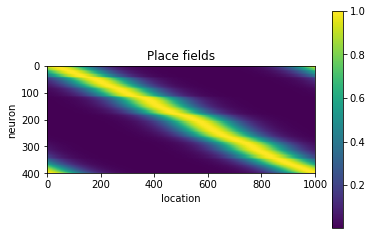

In [3]:
test_network.plot_place_fields(environment_index, 
                               only_active_neurons="yes") # sanity check

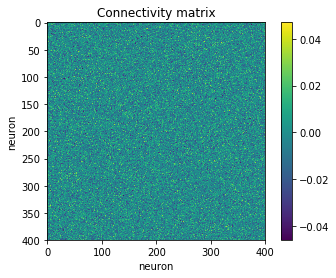

In [4]:
test_network.plot_connectivity(environment_index, 
                               only_active_neurons="yes", 
                               include_fixed_connectivity="yes")

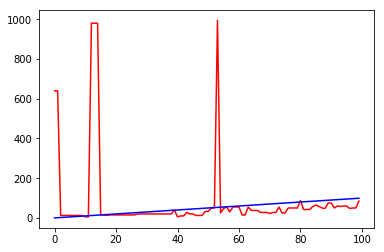

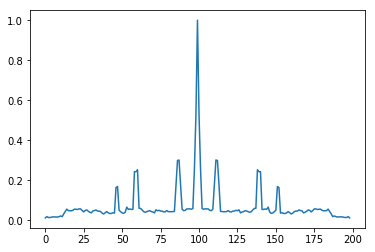

SpearmanrResult(correlation=0.59845539001572989, pvalue=4.8417310019131638e-11)
[[ 1276.11854226]]


In [5]:
## Show Spearman rank correlation and total size of the connectivity matrix

test_network.plot_trajectory_and_decoded_trajectory(environment_index)

# Compute and plot autocorrelation highest activations 
test_network.compute_autocorrelation_highest_activation(environment_index)
test_network.plot_autocorrelation_highest_activation()

print test_network.compute_rank_correlation_activations(environment_index)
print test_network.size_connectivity

In [6]:
## Step 2: train in environment 0

environment_index = 0 # choose environment

# Set trajectory parameters
rat_speed = 1*(2*np.pi)/1000. # rat speed in Hz
initial_position = 0 # initial position of the rat
trajectory_parameters = {"trajectory_type": trajectory_type, 
                "rat_speed": rat_speed, 
                "initial_position": initial_position, 
                "number_locations_arm": number_locations_arm, 
                "left_direction_probability": left_direction_probability}

# Set time parameters
initial_time = 0
time_step = 1
end_time = 2000
time_parameters = {"initial_time": initial_time, 
                   "time_step": time_step, "end_time": end_time}

test_network.run_simulation(time_parameters, trajectory_parameters, 
                            environment_index, 
                            learning="yes", spontaneous_activity="no") 
                            
test_network.update_connectivity(scaling=0.4, subtract_mean="yes")

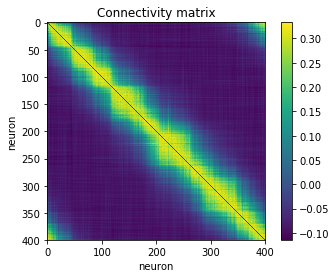

In [7]:
test_network.plot_connectivity(environment_index, 
                               only_active_neurons="yes", 
                               include_fixed_connectivity="yes")

/home/lucamb/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


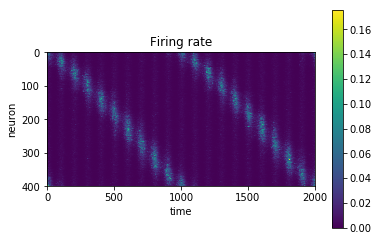

In [8]:
test_network.plot_firing_rate(environment_index, neuron_type="excitatory", 
                              only_active_neurons="yes", ratio_axes=2.5)

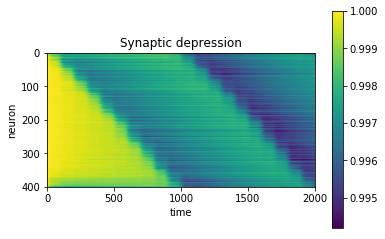

In [9]:
test_network.plot_synaptic_depression(environment_index, 
                                      neuron_type="excitatory", 
                                      only_active_neurons="yes", 
                                      ratio_axes=2.5)

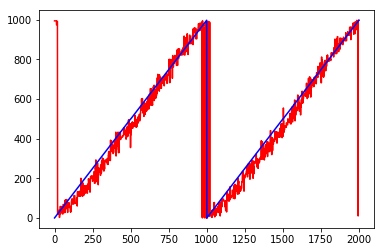

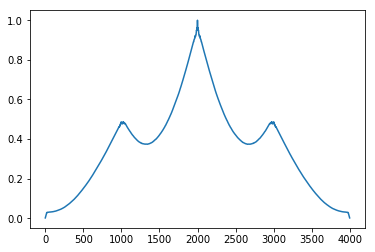

SpearmanrResult(correlation=0.86460268004710827, pvalue=0.0)
[[ 1276.11854226]]


In [10]:
#### TEST ####

test_network.plot_trajectory_and_decoded_trajectory(environment_index)

# Compute and plot autocorrelation highest activations 
test_network.compute_autocorrelation_highest_activation(environment_index)
test_network.plot_autocorrelation_highest_activation()

print test_network.compute_rank_correlation_activations(environment_index)
print test_network.size_connectivity

In [11]:
## Step 3: spontaneous activity

test_network.depression_time = 200. 
test_network.synaptic_depletion = 0.2*10**-0

# Set time parameters
initial_time = 0
time_step = 1
end_time = 1000
time_parameters = {"initial_time": initial_time, "time_step": time_step, 
                   "end_time": end_time}

test_network.oscillatory_current = 0.
test_network.random_current = 5.

test_network.run_simulation(time_parameters, trajectory_parameters, 
                            environment_index, learning="no", 
                            spontaneous_activity="yes", 
                            connectivity_scaling=10000.)

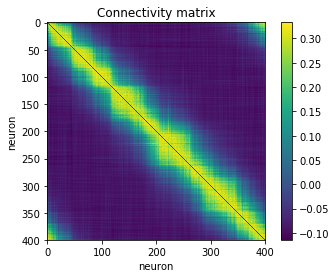

In [12]:
test_network.plot_connectivity(environment_index, 
                               only_active_neurons="yes", 
                               include_fixed_connectivity="yes")

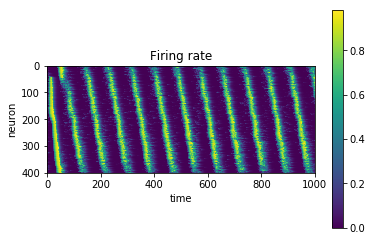

In [13]:
test_network.plot_firing_rate(environment_index, neuron_type="excitatory", 
                              only_active_neurons="yes", log_scale="no", 
                              ratio_axes=1)

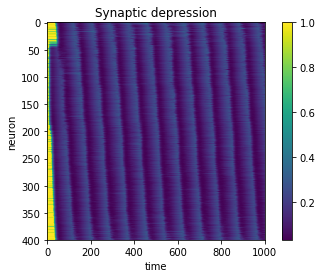

In [14]:
test_network.plot_synaptic_depression(environment_index, 
                                      neuron_type="excitatory", 
                                      only_active_neurons="yes", 
                                      ratio_axes=2.5)

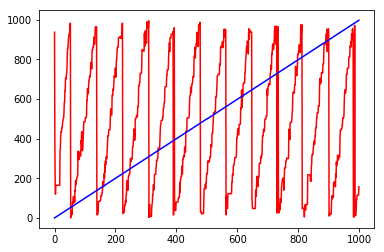

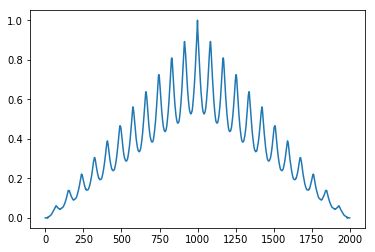

SpearmanrResult(correlation=0.010597950761052098, pvalue=0.73783113220328089)
[[ 14466.03133582]]


In [18]:
#### TEST ####

test_network.plot_trajectory_and_decoded_trajectory(environment_index)

# Compute and plot autocorrelation highest activations 
test_network.compute_autocorrelation_highest_activation(environment_index)
test_network.plot_autocorrelation_highest_activation()

print test_network.compute_rank_correlation_activations(environment_index)
print test_network.size_connectivity